# **PyTorch WorkFlow**

let`s explore a an example Pytorch end-to-end workflow



In [774]:
what_were_concering = {1: "data (prepare and load)",
                       2: "build model",
                       3: "fitting the model to data(training)",
                       4: "making predictions and evaluating a model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together"}
what_were_concering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [775]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks (https://pytorch.org/docs/stable/nn.html)
import matplotlib.pyplot as plt

torch.__version__


'2.3.0+cu121'

## 1. Data (preparing and loading)
Data can be anything... in machine learning.

* Excel spreadsheet
* Image of any kind
* Videos (Youtube or etc)
* Audio like song or prodcasts
* DNA 
* Text
* etc... many more

Machine learning is a game of tow parts:

* Get data into a numerical representation.
* build a `model` to learn `Patterns` in the `numerical representaion`.

To showcase this, let's create some `Known` data using the `linear regression1` formula = `y = mx + c`

* The simple linear regression line, ^y=a+bx y ^ = a + b x , can be #interpreted as follows: ^y is the predicted value of y , a is the intercept and predicts where the regression line will cross the y -axis, b predicts the change in y for every unit change in x .

 We'll use a linear regression fomula to make a straight line with **known** `Parameters`




In [776]:
# Create *known* Parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias


X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [777]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets(one of moxt import concept in machine learning in gerneral)
lets creat ea training and test set with our data.



In [778]:
#create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [779]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [780]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    plt.figure(figsize = (10, 7))

    #plot traing data in blue
    plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")  

    #plot test data in red
    plt.scatter(test_data, test_label, c = "r", s = 4, label = "Testing data")

    #are there predictions
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions, c = "g", s = 4, label = "Predictions")
    
    #show the legends
    plt.legend(prop={"size": 14});
 

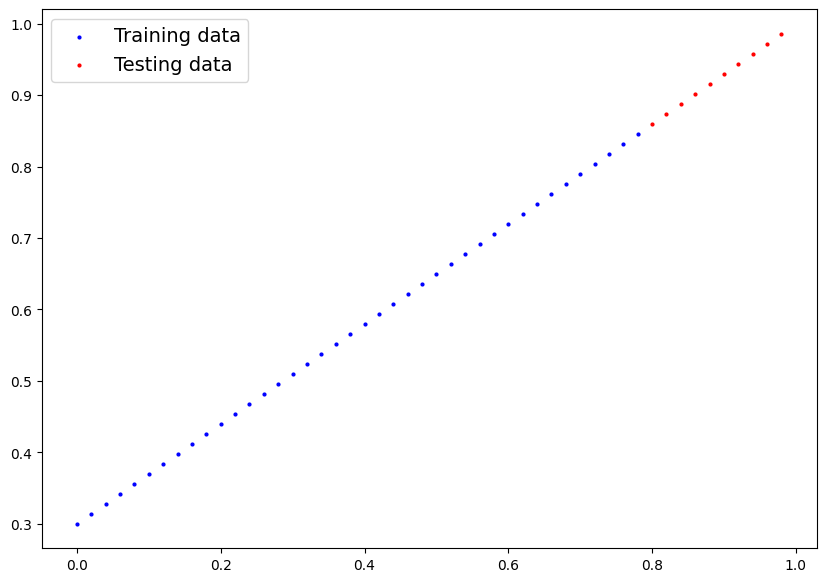

In [781]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build a model
• Our first pytorch model!

• Oops concept from the resource **https://realpython.com/python-classes/**•

Through tow main `algorithms:`  

• `Gradient descent`

• `Backpropagation`








In [782]:
# create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self): #Initialize model parameters
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True,
                                                dtype = torch.float))
        
        self.bias = nn.Parameter(torch.rand(1,requires_grad=True,
                                           dtype = torch.float))
    #forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #<-x is the linear regression formula 
        return self.weights * x + self.bias #this is the linear regression formula

#set manual seed
#torch.manual_seed(42)


•Subclass`nn.models:` this contains all the building blocks for neural networks

•`def __init__(self):`
        
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True,
                                                dtype = torch.float))
        
        
 Initialise `model parameters` to be used in various computation(this could be diffrent layers from `torch.nn` single parameters, hard_coded values or functions)

•`...`self.bias = nn.Parameter(torch.rand(1,requires_grad=True,
                                           dtype = torch.float))
                                           
  `requires_grad = true` means pytorch will track the gradient of this specific parameter for use with `torch.autograde` and gradient descent (for many `torch.nn` models, `requires_grade = true` is set by default)

### **PyTorch model building essentials**

• `torch.nn` - contains all of the building for computational graphs ( a neural networks can be considered a `computational` )

• `torch.nn.Parameter` - what parameters should our model try and learn, often a Pytorch layer from `torch.nn` will set for us

• `torch.nn.Module` - The base class for all neural network, if you subclass it, you should `overwrite forward()`

• `torch.optim` - this where the optimizers in `PyTorch` live, they will help with `gradient descent`

• `def forward()` - All nn.Module subclass requires you to overwrite `forward()` , this method defines what happens in the foward computation



### **Checking the content of our Pyorch Model**

•Now we've created a model , lets see what's inside..

•So we can check our model parameters or what's inside our model using . `parameters()`

In [783]:
#torch.randn(1)
#torch.manual_seed(42)
#torch.randn(1)

In [784]:
#torch.randn(2)
# create a random seed
torch.manual_seed(42)

#create an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [785]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [786]:
weight, bias

(0.7, 0.3)

### **Making prediction using `torch.inference_mode()`**
 
To check our model's `predict power`let's see how well it predict `Y_test` based on `X_test`

Whene we pass data through our model, it's going to run it trough the `forward()` method

In [787]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

see more about `inference` mode
it dosent required or allow to track of `grad desent` or some thing like this 

In [788]:
#make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

#  You cqan also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
#  torch.no_grad() as well

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [789]:
y_test



tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

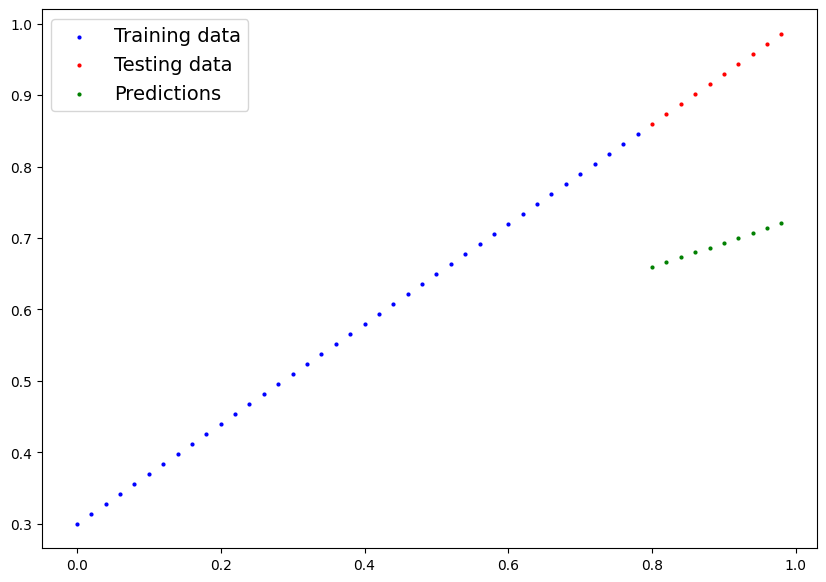

In [790]:
plot_predictions(predictions =y_preds)

### 3. **Train model**

• The whole idea of training is for a model to move frome *unknown parameters* (these may be random)to the *Known parameters*.

•On in other words from a poor representation of the data better representation of the data

• One way to messure how poor or how wrong your models prediction are is to use a `loss function`

* Note: `Loss function may` also be called `cost function` or `criterion` in diffrent areas. For our case, we're going to refer to it as `loss function`

Things we need to Train:

**• Loss Function:** A function to mesure how wrong your model's prediction are to the ideal outpout, Lower is better.

**• Optimizer:** Takes into account the loss of a model and adjust teh model's parameters (e.g. weights & bias in our case) to improve the loss Function

* Inside the optimizer you'll often have to set two parameters:

    * `params` - the model parameters you'd like to optimize, for example 
    `params=model_0.parameters()`

    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)





How does it do so?

Through two main algorithms:

Gradient descent - https://youtu.be/IHZwWFHWa-w

Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [791]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [792]:
model_0.state_dict() #check out our model's parameters (a parameter is a value that the model sets itself)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [793]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) #lr = learning rate

#### Output explanation Of the output(`Optimizer`)

* **https://chatgpt.com/share/7d8337d1-4ec6-409d-a23d-5a0a77db58b2**

### Creating an optimization loop in PyTorch

Now we've got a loss function and an optimizer, it's now time to create a **training loop** (and **testing loop**).



### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` | 
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb: 
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* stepping them (`optimizer.step()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.



### PyTorch testing loop

As for the testing loop (evaluating our model), the typical steps include:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_test)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_test)` | 
| 3 | Calulate evaluation metrics (optional) | Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. | Custom functions |

Notice the testing loop doesn't contain performing backpropagation (`loss.backward()`) or stepping the optimizer (`optimizer.step()`), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

Let's put all of the above together and train our model for 100 **epochs** (forward passes through the data) and we'll evaluate it every 10 epochs.


In [794]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    print(f"loss: {loss}")

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

loss: 0.08169572055339813
Epoch: 0 | MAE Train Loss: 0.08169572055339813 | MAE Test Loss: 0.22662055492401123 
loss: 0.07951223105192184
loss: 0.07771821320056915
loss: 0.07596267759799957
loss: 0.07452543079853058
loss: 0.07310795783996582
loss: 0.07197895646095276
loss: 0.0708499550819397
loss: 0.0698218122124672
loss: 0.06895165145397186
loss: 0.06808149069547653
Epoch: 10 | MAE Train Loss: 0.06808149069547653 | MAE Test Loss: 0.1807345449924469 
loss: 0.06732632219791412
loss: 0.06666463613510132
loss: 0.06600294262170792
loss: 0.06540142744779587
loss: 0.06489682197570801
loss: 0.06439221650362015
loss: 0.06388760358095169
loss: 0.06338393688201904
loss: 0.062983937561512
loss: 0.06258393079042435
Epoch: 20 | MAE Train Loss: 0.06258393079042435 | MAE Test Loss: 0.15627031028270721 
loss: 0.062183927744627
loss: 0.06178393214941025
loss: 0.0613839253783226
loss: 0.06098393350839615
loss: 0.0605839304625988
loss: 0.06018794700503349
loss: 0.05983894318342209
loss: 0.0594899356365203

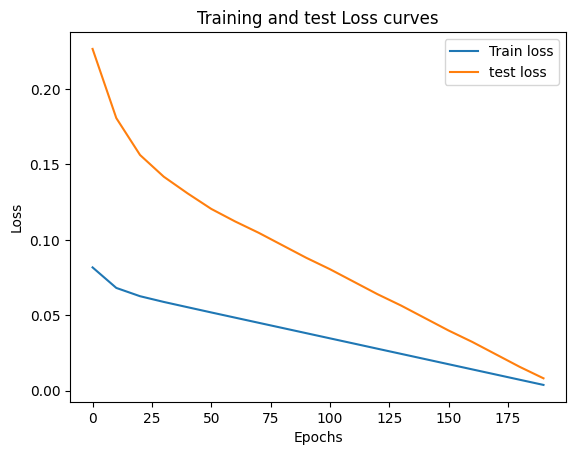

In [795]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("Training and test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [796]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6962]), 'bias': tensor([0.3064])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## 4. Making predictions with a trained PyTorch model (inference)

Once you've trained a model, you'll likely want to make predictions with it.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`).

2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`).

3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

In [797]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

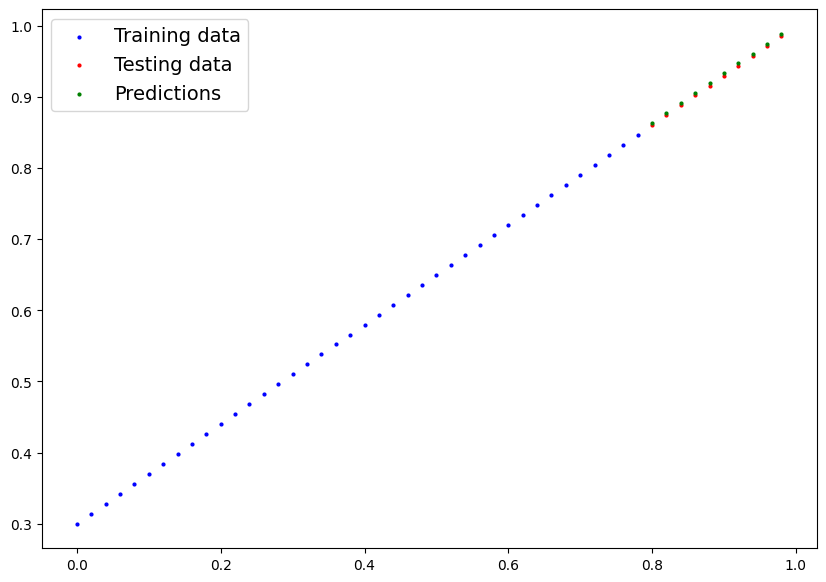

In [798]:
plot_predictions(predictions=y_preds)

In [799]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

## 5. **Saving and loading a PyTorch model**

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it. 

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? | 
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  | 
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. | 

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.


### Saving a PyTorch model's `state_dict()`

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


In [800]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "03_pytorch_workflow_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\03_pytorch_workflow_model_3.pth


it's train time!

do the forward pass,

calculate the loss,

optimizer zero grad,

loss backwaeds!


* Optimizer step step step


let's test now!

with torch no grad:

do the forward pass,

calaculate the loss,

watch it go down down!

**Since we saved our model's `state_dict()` rather the emtier model, we'll create a new instance of uor model class and state_dict() into that**

In [801]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()    

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [802]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [803]:
# MAke sure predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [804]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [805]:
#make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds =model_0(X_test)

y_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

## 6. Putting it all together 
 
 let's go back throug the steps above and see it all in one place.
 

* **Create device-agnostic code.**

this means if we've got access to a `GPU`, our code will use it (for potentially faster computing).

If no `GPU` is available, the code will defaoult to using `CPU`

In [806]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


#### 6.1 Data

In [807]:
# Create some data using the linear regression formula of u = weight * x + bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and lables)
x = torch.arange(start, end, step).unsqueeze(dim =1)#Without unsqueeze, it throws an error
y = weight * x + bias

In [808]:
x, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [809]:
#split data
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test= x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [810]:
def plot_predictions(train_data = x_train,
                     train_label = y_train,
                     test_data = x_test,
                     test_label = y_test,
                     predictions = None):
    plt.figure(figsize = (10, 7))

    #plot traing data in blue
    plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")  

    #plot test data in red
    plt.scatter(test_data, test_label, c = "r", s = 4, label = "Testing data")

    #are there predictions
    if predictions is not None:
        #plot the predictions if they exist
        predictions_np = predictions.detach().cpu().numpy()
        plt.scatter(test_data.cpu().numpy(), predictions_np, c = "g", s = 4, label = "Predictions")
    
    #show the legends
    plt.legend(prop={"size": 14});

# def plot_predictions(train_data=x_train,
#                      train_label=y_train,
#                      test_data=x_test,
#                      test_label=y_test,
#                      predictions=None):
#     # Convert tensors to NumPy arrays
#     train_data_np = train_data.detach().cpu().numpy()
#     train_label_np = train_label.detach().cpu().numpy()
#     test_data_np = test_data.detach().cpu().numpy()
#     test_label_np = test_label.detach().cpu().numpy()
    
#     if predictions is not None:
#         predictions_np = predictions.detach().cpu().numpy()
    
#     # Check the sizes
#     if train_data_np.shape[0] != train_label_np.shape[0]:
#         raise ValueError("train_data and train_label must have the same number of elements.")
#     if test_data_np.shape[0] != test_label_np.shape[0]:
#         raise ValueError("test_data and test_label must have the same number of elements.")
#     if predictions is not None and test_data_np.shape[0] != predictions_np.shape[0]:
#         raise ValueError("test_data and predictions must have the same number of elements.")
    
#     plt.figure(figsize=(10, 7))

#     # Plot training data in blue
#     plt.scatter(train_data_np, train_label_np, c="b", s=4, label="Training data")

#     # Plot test data in red
#     plt.scatter(test_data_np, test_label_np, c="r", s=4, label="Testing data")

#     # Plot predictions if they exist
#     if predictions is not None:
#         plt.scatter(test_data_np, predictions_np, c="g", s=4, label="Predictions")
    
#     # Show the legends
#     plt.legend(prop={"size": 14})
#     plt.show()




 

    

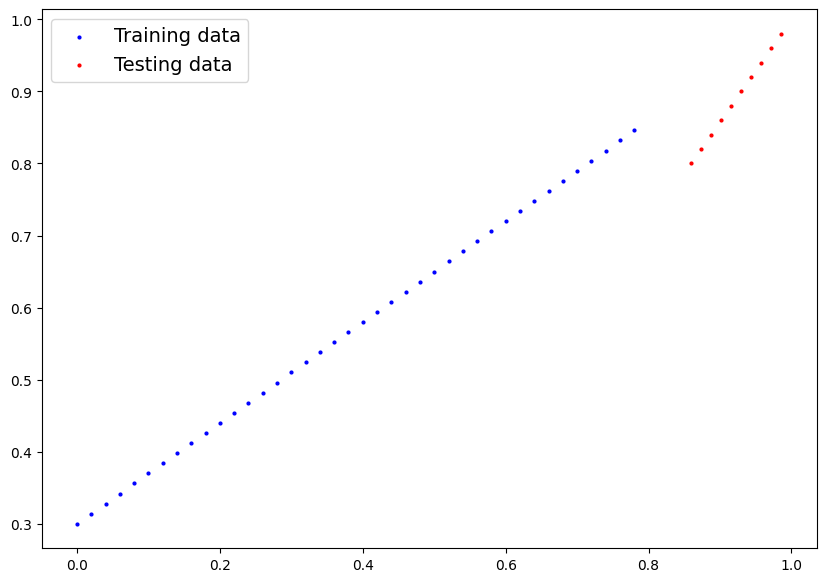

In [811]:
# Note : if you don't have the plot_predictoins() function loaded, this will error
plot_predictions(x_train, y_train, y_test, x_test)


### 6.2 Building a pytorch Linear model

In [812]:
#create a linear layer model by subclassing nn.Module
class LinearRegressionModelv2(nn.Module):
    def __init__(self):
        super().__init__()
        # USe nn.linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features = 1, 
                                      out_features = 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# set the manual seed 
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [813]:
x_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [814]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [815]:
next(model_1.parameters()).device

device(type='cpu')

In [816]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

### 6.3 Training

For training we need:

* loss function
* optimizer
* Training loop
* Testing loop


In [817]:
# setup Loss fuctiom
loss_fn == nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(lr=0.01, params= model_1.parameters())

In [818]:
# lets write the traing loop
torch.manual_seed(42)

epochs = 200

# put Data on the target device(device agnostic code)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test  = x_test.to(device)
y_test = y_test.to(device)
# Train

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform Backpropagation
    loss.backward()
    
    #optimizer step
    optimizer.step()

    ### testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

        

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [819]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [820]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions


In [821]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

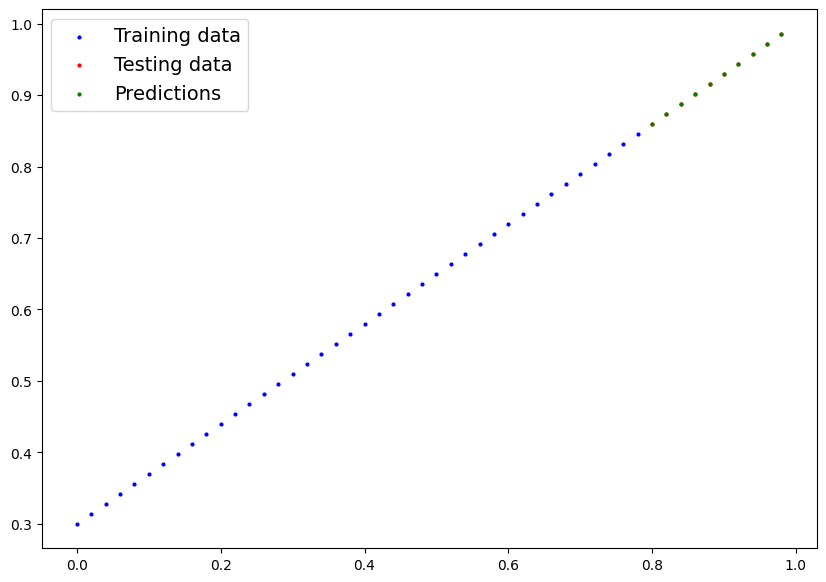

In [822]:
# Check out our model predicctions
plot_predictions(predictions = y_preds)

### 6.5 Saving & loading a trained model

In [824]:
from pathlib import Path

# 1. Create models directory    
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '03_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), f = MODEL_SAVE_PATH)


Saving model to: models\03_pytorch_workflow_model_1.pth


In [825]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [829]:
# load a pytorch model

# create a new instance o flinear regression model

loaded_model_1 = LinearRegressionModelv2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device) 


LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [833]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [834]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [836]:
# Evalute loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')